<a href="https://colab.research.google.com/github/ThaliSouza2017/data-science/blob/master/sessions_high_eng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importando bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Análise Correlação de nível de engajamento por evento de ida à loja
### 1. Hipótese: usuários com mais eventos de ir à loja retornam ao site com mais frequência?

In [2]:
#update de arquivos
from google.colab import files
uploaded = files.upload()

Saving comments.csv to comments.csv
Saving offer_likes.csv to offer_likes.csv
Saving outs.csv to outs.csv
Saving posted_offers.csv to posted_offers.csv


In [3]:
#criando o data set e exibindo as primeiras linhas
outs_full = pd.read_csv('outs.csv')
outs_full.head()
#outs_full.info()

,user_id,sessions,month,outs
0,27,41,march,5
1,50,100,march,6
2,120,5,march,1
3,128,31,march,1
4,138,76,march,11


In [4]:
#estatísticas descritivas do dataset
outs_full.describe().T
#1º quartil (Q1)	25% dos dados são menores que ou iguais a este valor.
#2º quartil (Q2)	A mediana. 50% dos dados são menores que ou iguais a este valor.
#3º quartil (Q3)	75% dos dados são menores que ou iguais a este valor.
#Amplitude interquartílica	A distância entre o 1o. e o 3o. quartis (Q3-Q1); assim, ele ultrapassa o meio de 50% dos dados.

,count,mean,std,min,25%,50%,75%,max
user_id,231292.0,453901.845719,218836.571653,17.0,261655.0,502466.5,654606.0,739693.0
sessions,231292.0,45.696431,105.674874,1.0,3.0,10.0,39.0,4314.0
outs,231292.0,6.305129,18.352594,0.0,0.0,1.0,5.0,2274.0


In [0]:
#agrupando as sessões e idas à loja por usuário, independente do mês de ocorrência do evento, por média
outs_full.groupby('user_id')['sessions', 'outs'].mean()

In [6]:
#agrupando as sessões e idas à loja por usuário, independente do mês de ocorrência do evento, por somatória pois a média não era a melhor abordagem
#criando um novo data set com essas informações
outs_corr = outs_full.groupby('user_id')['sessions', 'outs'].sum()
outs_corr.head()

,sessions,outs
user_id,,
17,8,10
27,471,49
50,248,18
91,30,4
120,5,1


In [7]:
#descrevendo o novo data set
outs_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,102699.0,102.914527,302.036192,1.0,4.0,13.0,60.0,9555.0
outs,102699.0,14.200002,50.853214,0.0,0.0,1.0,8.0,8235.0


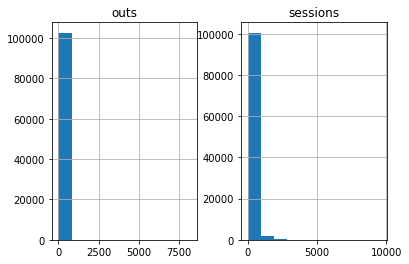

In [8]:
#plotando um histograma de sessões e ida à loja desse data set
outs_corr.hist(bins = 10)
plt.show()

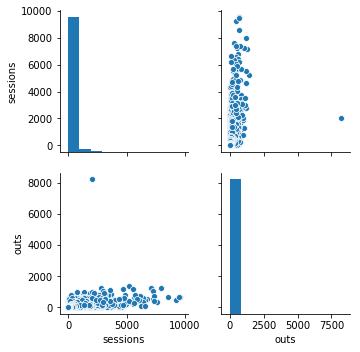

In [9]:
#plotando visualmente a correlação entre sessões e idas à loja
sns.pairplot(outs_corr)

In [0]:
#correlação entre sessões e ida à loja
outs_corr.corr()

,sessions,outs
sessions,1.000000,0.645435
outs,0.645435,1.000000


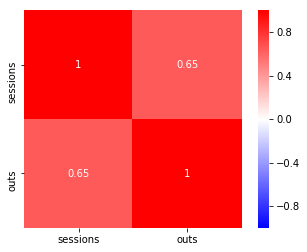

In [10]:
#plotando a correalação entre sessões e idas à loja
#coeficiente encontrado não indica forte correlação 
sns.heatmap(outs_corr.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

In [12]:
#criando novos datasets para dividir usuários com e sem registro de evento de ir á loja
#dataset com registro de ir á loja == 0
outs_without = outs_corr.query('outs == 0')
outs_without.head()

,sessions,outs
user_id,,
189,10,0
299,50,0
310,1,0
453,3,0
640,4,0


In [13]:
outs_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,48414.0,8.026129,20.593356,1.0,2.0,4.0,8.0,1625.0
outs,48414.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
#dataset com registro de ir à loja >= 1
outs_withy = outs_corr.query('outs >= 1')
outs_withy.head()

,sessions,outs
user_id,,
17,8,10
27,471,49
50,248,18
91,30,4
120,5,1


In [15]:
outs_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,54285.0,187.540610,396.253590,1.0,17.0,51.0,176.0,9555.0
outs,54285.0,26.864253,67.470248,1.0,2.0,7.0,25.0,8235.0


In [16]:
outs_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,48414.0,8.026129,20.593356,1.0,2.0,4.0,8.0,1625.0
outs,48414.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [0]:
#plotando o comportamento em sessões de usuários com e sem registro de ir à loja
outs_without.plot('outs', color='gray')
plt.title('usuários SEM registro de evento de ir à loja')
plt.xlabel('SESSÕES')
plt.rcParams['figure.figsize'] = (11 ,7)
plt.savefig('usuários SEM registro de evento de ir à loja.png')

outs_withy.plot('outs', color='purple')
plt.title('usuários COM registro de evento de ir à loja')
plt.xlabel('SESSÕES')
plt.rcParams['figure.figsize'] = (11 ,7)
plt.savefig('usuários COM registro de evento de ir à loja.png')

plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


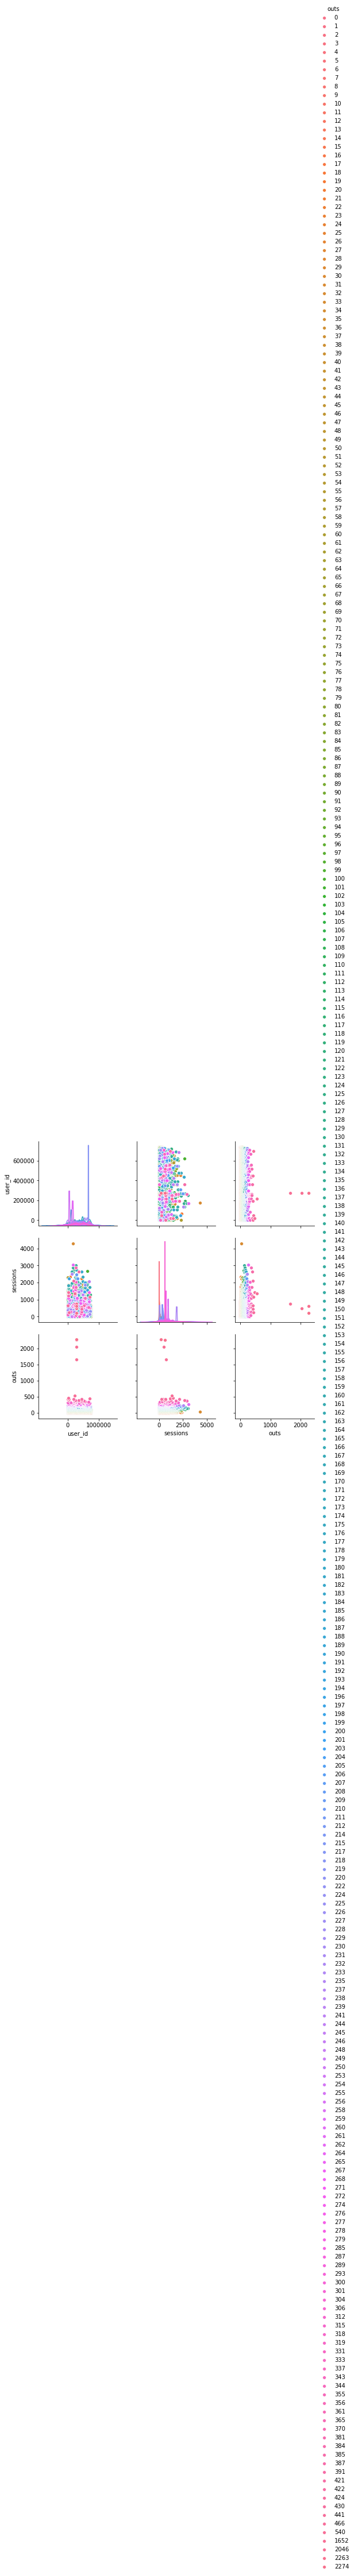

In [38]:
sns.pairplot(outs_full, hue = 'outs')

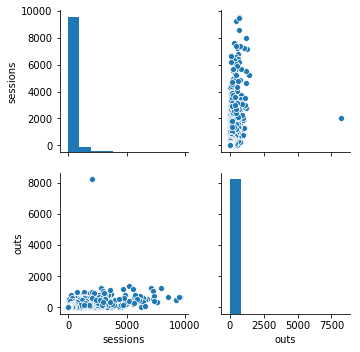

In [18]:
sns.pairplot(outs_withy)

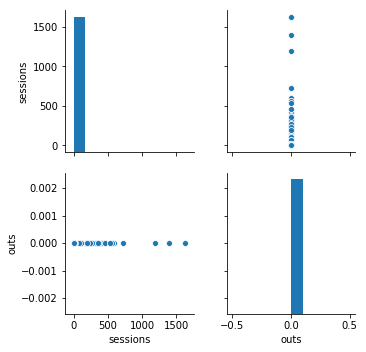

In [0]:
sns.pairplot(outs_without)

In [19]:
outs_withy.corr()


,sessions,outs
sessions,1.000000,0.616475
outs,0.616475,1.000000


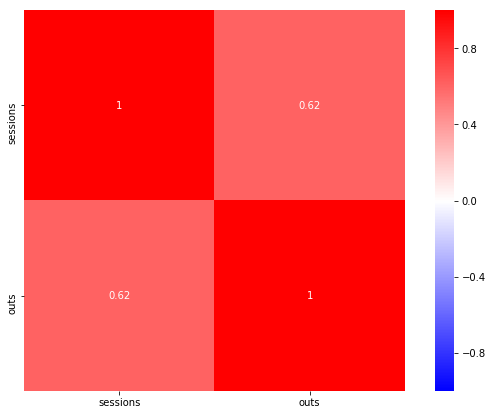

In [20]:
sns.heatmap(outs_withy.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

### OUTS X SESSIONS = CORR 0.62
###Correlação fraca entre eventos de sessões e ir à loja 

### 2. Hipótese: usuários que mais postam ofertas retornam ao site com mais frequência?

In [22]:
#criando o data set e exibindo as primeiras linhas
posted_offers_full = pd.read_csv('posted_offers.csv')
posted_offers_full.head()
#outs_full.info()

,user_id,sessions,month,posted_offers
0,27,41,march,0
1,50,100,march,0
2,120,5,march,0
3,128,31,march,0
4,138,76,march,0


In [23]:
posted_offers_full.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,231292.0,453901.845719,218836.571653,17.0,261655.0,502466.5,654606.0,739693.0
sessions,231292.0,45.696431,105.674874,1.0,3.0,10.0,39.0,4314.0
posted_offers,231292.0,0.053538,5.012765,0.0,0.0,0.0,0.0,1775.0


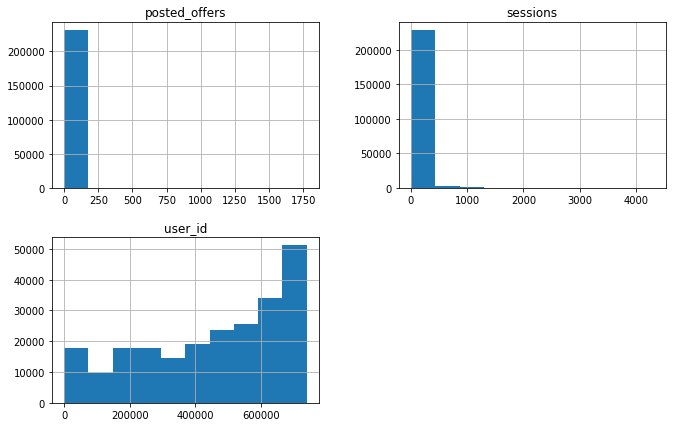

In [0]:
posted_offers_full.hist(bins = 10)
plt.show()

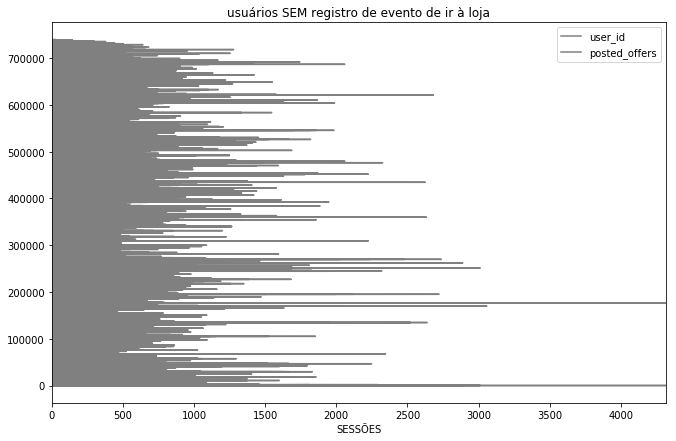

In [0]:
#plotando o comportamento em sessões de usuários com e sem registro de ir à loja
posted_offers_full.plot('sessions', color='gray')
plt.title('usuários SEM registro de evento de ir à loja')
plt.xlabel('SESSÕES')
plt.rcParams['figure.figsize'] = (11 ,7)
plt.savefig('usuários SEM registro de evento de ir à loja.png')

In [24]:
posted_offers_full.corr()

,user_id,sessions,posted_offers
user_id,1.000000,-0.188025,-0.007755
sessions,-0.188025,1.000000,0.063014
posted_offers,-0.007755,0.063014,1.000000


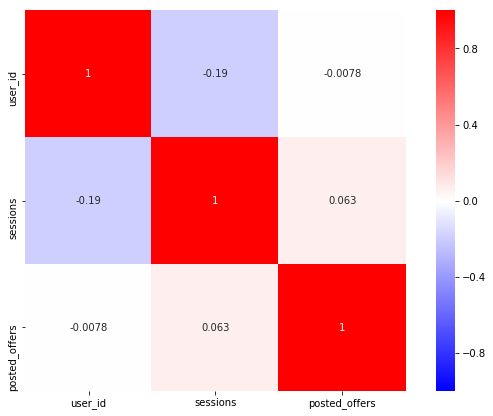

In [25]:
sns.heatmap(posted_offers_full.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

In [26]:
posted_offers_corr = posted_offers_full.groupby('user_id')['sessions', 'posted_offers'].sum()
posted_offers_corr.head()

,sessions,posted_offers
user_id,,
17,8,0
27,471,0
50,248,0
91,30,0
120,5,0


In [27]:
#dataset com registro de ofertas postadas
offers_withy = posted_offers_corr.query('posted_offers >= 1')
offers_withy.head()
offers_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,1319.0,662.886277,896.505536,1.0,125.5,352.0,830.5,9240.0
posted_offers,1319.0,9.388173,96.409137,1.0,1.0,1.0,3.0,2854.0


In [28]:
offers_without = posted_offers_corr.query('posted_offers == 0')
offers_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,101380.0,95.629039,278.982095,1.0,3.0,12.0,57.0,9555.0
posted_offers,101380.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [29]:
offers_withy.corr()

,sessions,posted_offers
sessions,1.000000,0.133199
posted_offers,0.133199,1.000000


In [0]:
offers_without.plot('posted_offers', color='grey')
plt.title('sessões de usuários SEM registro ofertas enviadas')
plt.xlabel('SESSÕES')
plt.rcParams['figure.figsize'] = (11 ,7)

offers_withy.plot('posted_offers', color='purple')
plt.title('sessões de usuários COM registro ofertas enviadas')
plt.xlabel('SESSÕES')
plt.rcParams['figure.figsize'] = (11 ,7)



/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


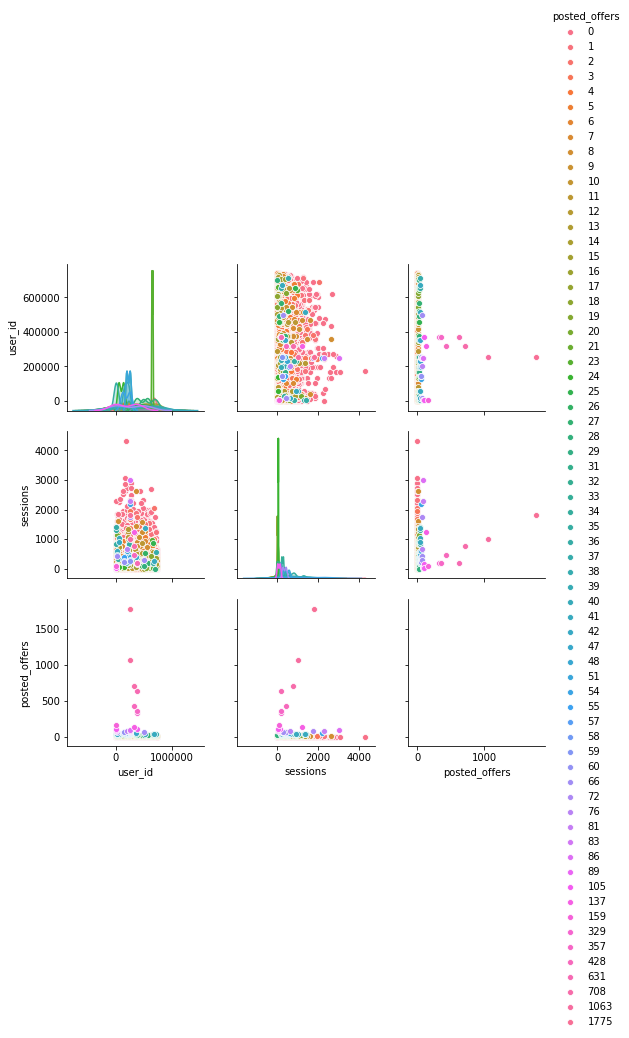

In [37]:
sns.pairplot(posted_offers_full, hue = 'posted_offers')

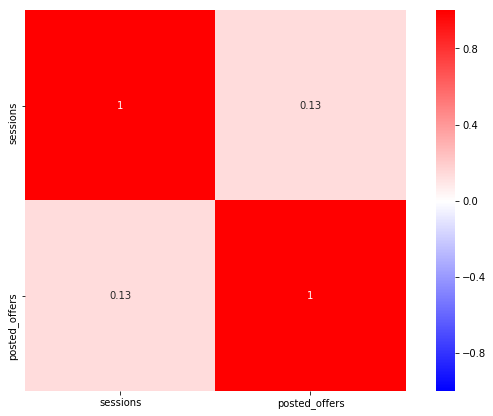

In [30]:
sns.heatmap(offers_withy.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

### POSTED OFFERS X SESSIONS = CORR 0.13
###Correlação fraca entre sessões e ofertas postadas

###3. Hipótese: usuários que curtem mais ofertas retornam ao site com mais frequência?

In [41]:
#criando o data set
offer_likes_full = pd.read_csv('offer_likes.csv')
offer_likes_full.head()

,user_id,sessions,month,offer_likes
0,27,41,march,0
1,50,100,march,0
2,120,5,march,0
3,128,31,march,0
4,138,76,march,0


In [42]:
offer_likes_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231292 entries, 0 to 231291
Data columns (total 4 columns):
user_id        231292 non-null int64
sessions       231292 non-null int64
month          231292 non-null object
offer_likes    231292 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.1+ MB


In [44]:
offer_likes_full.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,231292.0,453901.845719,218836.571653,17.0,261655.0,502466.5,654606.0,739693.0
sessions,231292.0,45.696431,105.674874,1.0,3.0,10.0,39.0,4314.0
offer_likes,231292.0,6.695614,148.810760,0.0,0.0,0.0,0.0,9480.0


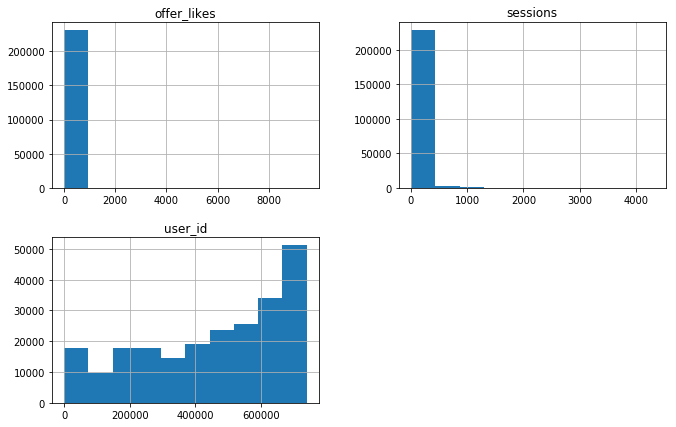

In [46]:
offer_likes_full.hist(bins = 10)
plt.show()

In [47]:
offer_likes_full.corr()

,user_id,sessions,offer_likes
user_id,1.000000,-0.188025,-0.032285
sessions,-0.188025,1.000000,0.102052
offer_likes,-0.032285,0.102052,1.000000


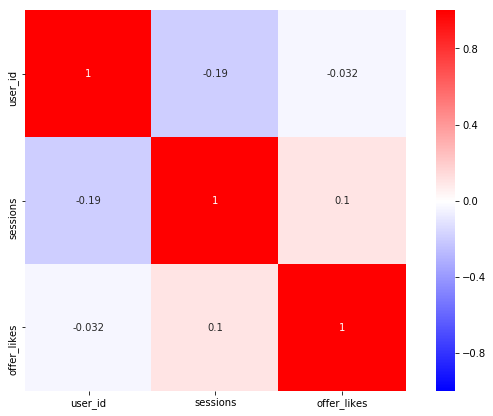

In [48]:
sns.heatmap(offer_likes_full.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

In [49]:
#separando datasets
likes_withy = offer_likes_full.query('offer_likes >= 1')
likes_withy.head()
#likes_withy.describe().T

,user_id,sessions,month,offer_likes
5,142,9,march,2
6,167,49,march,2
11,189,10,march,1
13,207,2,march,1
16,227,2,march,2


In [50]:
likes_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,42536.0,402831.820623,225501.232008,27.0,212529.0,424792.0,615057.0,739625.0
sessions,42536.0,128.092957,182.791953,1.0,22.0,65.0,163.0,3058.0
offer_likes,42536.0,36.407796,345.446557,1.0,1.0,2.0,4.0,9480.0


In [51]:
#separando datasets
likes_without = offer_likes_full.query('offer_likes == 0')
likes_without.head()

,user_id,sessions,month,offer_likes
0,27,41,march,0
1,50,100,march,0
2,120,5,march,0
3,128,31,march,0
4,138,76,march,0


In [52]:
likes_without.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,188756.0,465410.431340,215643.631548,17.0,281661.0,519242.0,660249.0,739693.0
sessions,188756.0,27.128446,65.418336,1.0,2.0,7.0,23.0,4314.0
offer_likes,188756.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [53]:
offer_likes_corr = offer_likes_full.groupby('user_id')['sessions', 'offer_likes'].sum()
offer_likes_corr.head()

,sessions,offer_likes
user_id,,
17,8,0
27,471,3
50,248,0
91,30,0
120,5,0


In [54]:
offer_likes_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102699 entries, 17 to 739693
Data columns (total 2 columns):
sessions       102699 non-null int64
offer_likes    102699 non-null int64
dtypes: int64(2)
memory usage: 2.4 MB


In [55]:
#separando datasets
likes_withy = offer_likes_corr.query('offer_likes >= 1')
likes_withy.head()

,sessions,offer_likes
user_id,,
27,471,3
138,202,3
142,158,102
167,133,2
182,465,1


In [56]:
likes_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,25336.0,311.021116,528.980642,1.0,32.0,118.0,366.0,9555.0
offer_likes,25336.0,61.124171,821.111948,1.0,1.0,2.0,5.0,35628.0


In [57]:
#separando datasets
likes_without = offer_likes_corr.query('offer_likes == 0')
likes_without.head()

,sessions,offer_likes
user_id,,
17,8,0
50,248,0
91,30,0
120,5,0
128,40,0


In [58]:
likes_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,77363.0,34.760648,103.132904,1.0,3.0,7.0,24.0,6418.0
offer_likes,77363.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


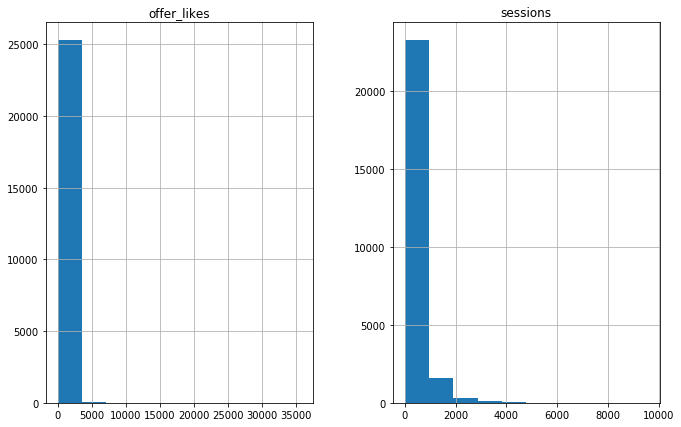

In [59]:
likes_withy.hist(bins = 10)
plt.show()

In [60]:
offer_likes_corr.corr()

,sessions,offer_likes
sessions,1.000000,0.108555
offer_likes,0.108555,1.000000


In [65]:
likes_withy.corr()

,sessions,offer_likes
sessions,1.000000,0.095766
offer_likes,0.095766,1.000000


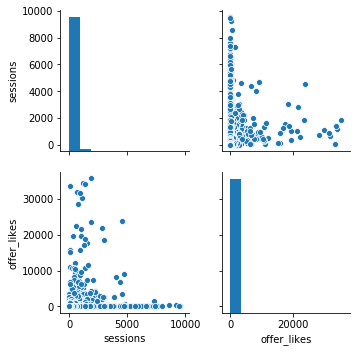

In [96]:
sns.pairplot(offer_likes_corr)

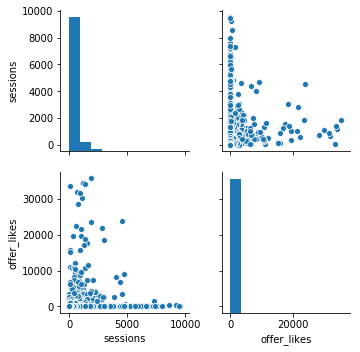

In [97]:
sns.pairplot(likes_withy)

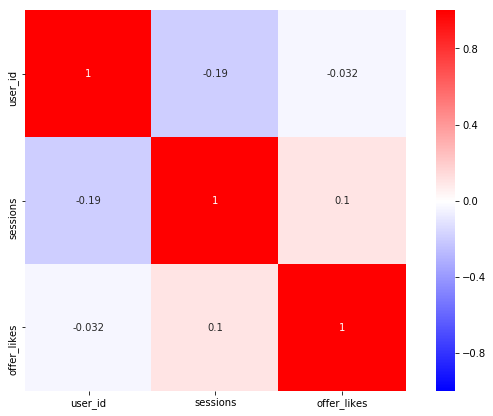

In [66]:
sns.heatmap(offer_likes_full.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

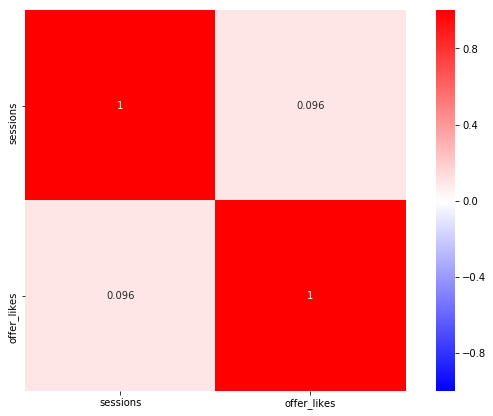

In [67]:
sns.heatmap(likes_withy.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

### OFFER LIKES X SESSIONS = CORR 0.09
###Correlação fraca entre eventos de curtir ofertas

###4. Hipótese: usuários que comentam nas ofertas retornam ao site com mais frequência?

In [71]:
#criando o data set
comments_full = pd.read_csv('comments.csv')
comments_full.head()

,user_id,sessions,month,comments
0,27,41,march,0
1,50,100,march,0
2,120,5,march,0
3,128,31,march,0
4,138,76,march,1


In [72]:
comments_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231292 entries, 0 to 231291
Data columns (total 4 columns):
user_id     231292 non-null int64
sessions    231292 non-null int64
month       231292 non-null object
comments    231292 non-null int64
dtypes: int64(3), object(1)
memory usage: 7.1+ MB


In [73]:
comments_full.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,231292.0,453901.845719,218836.571653,17.0,261655.0,502466.5,654606.0,739693.0
sessions,231292.0,45.696431,105.674874,1.0,3.0,10.0,39.0,4314.0
comments,231292.0,0.423625,5.413541,0.0,0.0,0.0,0.0,1120.0


In [76]:
comments_corr = comments_full.groupby('user_id')['sessions', 'comments'].sum()
comments_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102699 entries, 17 to 739693
Data columns (total 2 columns):
sessions    102699 non-null int64
comments    102699 non-null int64
dtypes: int64(2)
memory usage: 2.4 MB


In [78]:
comments_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,102699.0,102.914527,302.036192,1.0,4.0,13.0,60.0,9555.0
comments,102699.0,0.954060,15.173537,0.0,0.0,0.0,0.0,3842.0


In [81]:
comments_corr.corr()

,sessions,comments
sessions,1.000000,0.181959
comments,0.181959,1.000000


In [82]:
comments_withy = comments_corr.query('comments >= 1')
comments_withy.head()

,sessions,comments
user_id,,
138,202,10
142,158,3
167,133,4
168,7,2
190,459,15


In [83]:
comments_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,10843.0,433.881583,635.817264,1.0,71.0,211.0,543.5,9240.0
comments,10843.0,9.036337,45.910908,1.0,1.0,2.0,7.0,3842.0


In [84]:
comments_withy.corr()

,sessions,comments
sessions,1.000000,0.168134
comments,0.168134,1.000000


In [85]:
comments_without = comments_corr.query('comments == 0')
comments_without.head()

,sessions,comments
user_id,,
17,8,0
27,471,0
50,248,0
91,30,0
120,5,0


In [89]:
comments_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,91856.0,63.846031,199.551781,1.0,3.0,10.0,38.0,9555.0
comments,91856.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


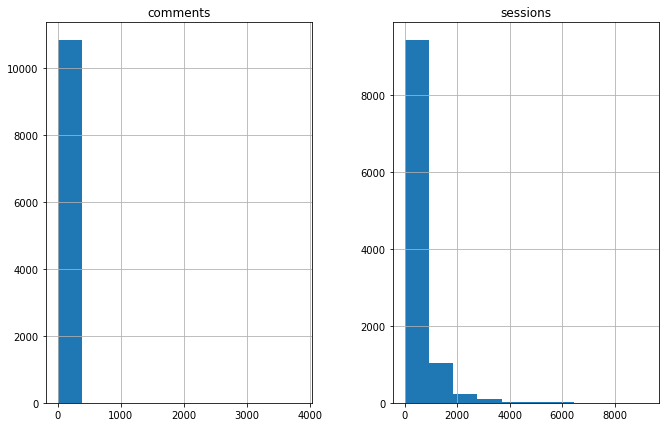

In [90]:
comments_withy.hist(bins = 10)
plt.show()

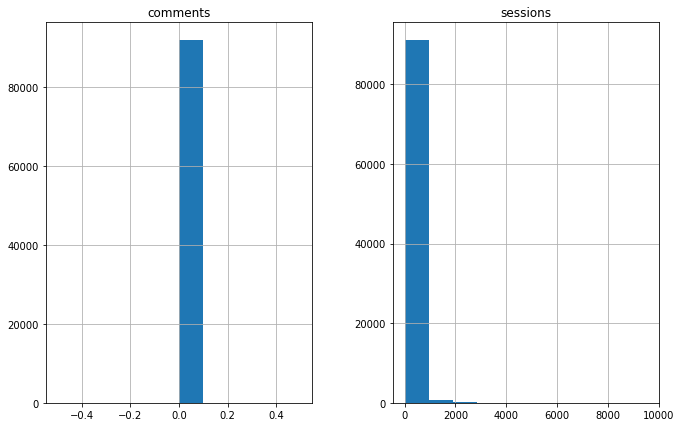

In [93]:
comments_without.hist(bins = 10)
plt.show()

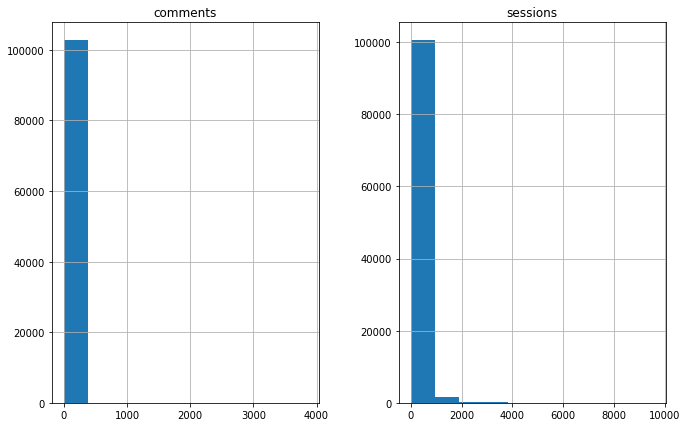

In [91]:
comments_corr.hist(bins = 10)
plt.show()


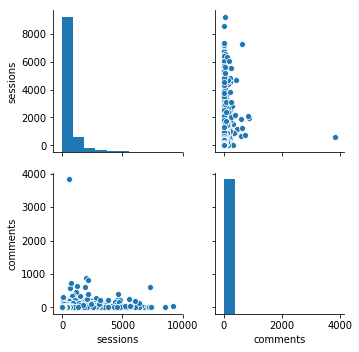

In [95]:
sns.pairplot(comments_withy)

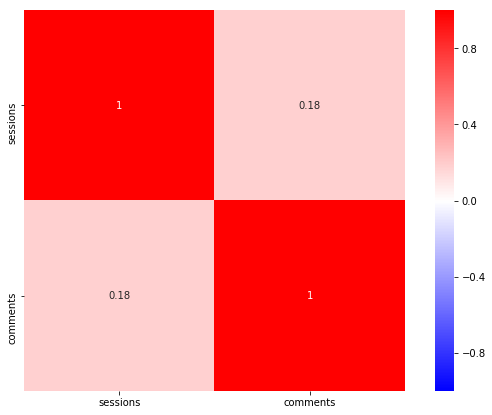

In [98]:
sns.heatmap(comments_corr.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

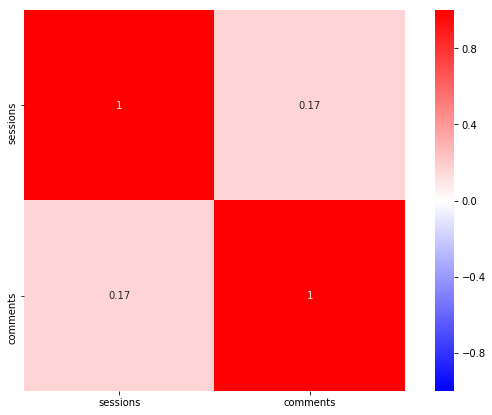

In [99]:
sns.heatmap(comments_withy.corr(), cmap='bwr', vmax=1, vmin=-1, center=0, square=True, annot=True)

### COMMENTS X SESSIONS = CORR 0.17
###Correlação fraca entre sessões e comentários

##RESUMO

In [102]:
offer_likes_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,102699.0,102.914527,302.036192,1.0,4.0,13.0,60.0,9555.0
outs,102699.0,14.200002,50.853214,0.0,0.0,1.0,8.0,8235.0


In [103]:
outs_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,54285.0,187.540610,396.253590,1.0,17.0,51.0,176.0,9555.0
outs,54285.0,26.864253,67.470248,1.0,2.0,7.0,25.0,8235.0


In [101]:
outs_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,48414.0,8.026129,20.593356,1.0,2.0,4.0,8.0,1625.0
outs,48414.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [104]:
offer_likes_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,102699.0,102.914527,302.036192,1.0,4.0,13.0,60.0,9555.0
offer_likes,102699.0,15.079426,408.682865,0.0,0.0,0.0,0.0,35628.0


In [106]:
likes_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,25336.0,311.021116,528.980642,1.0,32.0,118.0,366.0,9555.0
offer_likes,25336.0,61.124171,821.111948,1.0,1.0,2.0,5.0,35628.0


In [105]:
likes_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,77363.0,34.760648,103.132904,1.0,3.0,7.0,24.0,6418.0
offer_likes,77363.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [107]:
posted_offers_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,102699.0,102.914527,302.036192,1.0,4.0,13.0,60.0,9555.0
posted_offers,102699.0,0.120576,10.972855,0.0,0.0,0.0,0.0,2854.0


In [108]:
offers_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,1319.0,662.886277,896.505536,1.0,125.5,352.0,830.5,9240.0
posted_offers,1319.0,9.388173,96.409137,1.0,1.0,1.0,3.0,2854.0


In [109]:
offers_without.describe().T


,count,mean,std,min,25%,50%,75%,max
sessions,101380.0,95.629039,278.982095,1.0,3.0,12.0,57.0,9555.0
posted_offers,101380.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [110]:
comments_corr.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,102699.0,102.914527,302.036192,1.0,4.0,13.0,60.0,9555.0
comments,102699.0,0.954060,15.173537,0.0,0.0,0.0,0.0,3842.0


In [111]:
comments_withy.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,10843.0,433.881583,635.817264,1.0,71.0,211.0,543.5,9240.0
comments,10843.0,9.036337,45.910908,1.0,1.0,2.0,7.0,3842.0


In [112]:
comments_without.describe().T

,count,mean,std,min,25%,50%,75%,max
sessions,91856.0,63.846031,199.551781,1.0,3.0,10.0,38.0,9555.0
comments,91856.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
